In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertisers = pd.read_csv('advertisers.csv')

In [5]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [7]:
advertisers.shape

(20832, 5)

In [9]:
advertisers.isnull().sum()

Page ID                     0
Page name                   0
Disclaimer                  0
Amount spent (INR)          0
Number of ads in Library    0
dtype: int64

Disclaimer : means who paid for the ads

In [12]:
advertisers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Page ID                   20832 non-null  int64 
 1   Page name                 20832 non-null  object
 2   Disclaimer                20832 non-null  object
 3   Amount spent (INR)        20832 non-null  object
 4   Number of ads in Library  20832 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 813.9+ KB


In [14]:
locations = pd.read_csv('locations.csv')

In [16]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [18]:
locations.shape

(36, 2)

In [20]:
locations.isnull().sum()

Location name         0
Amount spent (INR)    0
dtype: int64

In [22]:
results = pd.read_csv('results.csv')

In [24]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


1) PC_Name : parliamentary consituency name
2) total elctors : total registered voters
3) total vote : total votes cast

In [27]:
results.shape

(550, 8)

In [29]:
results.isnull().sum()

_id                0
Sl No              7
State              7
PC_Name            0
Total Electors     0
Polled (%)         0
Total Votes        0
Phase             58
dtype: int64

We merge locations and results column on the basis of location name & state column from respective datasets

In [32]:
locations['Location name'] = locations['Location name'].str.strip().str.lower()  # strip remove extra spaces before & after and lower to make all lowercase

results['State'] = results['State'].str.strip().str.lower()

merged_data = results.merge(locations, left_on = 'State', right_on = 'Location name', how = 'left')

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [34]:
SpendByState = merged_data.groupby('State')['Amount spent (INR)'].sum().sort_values(ascending=False).reset_index()

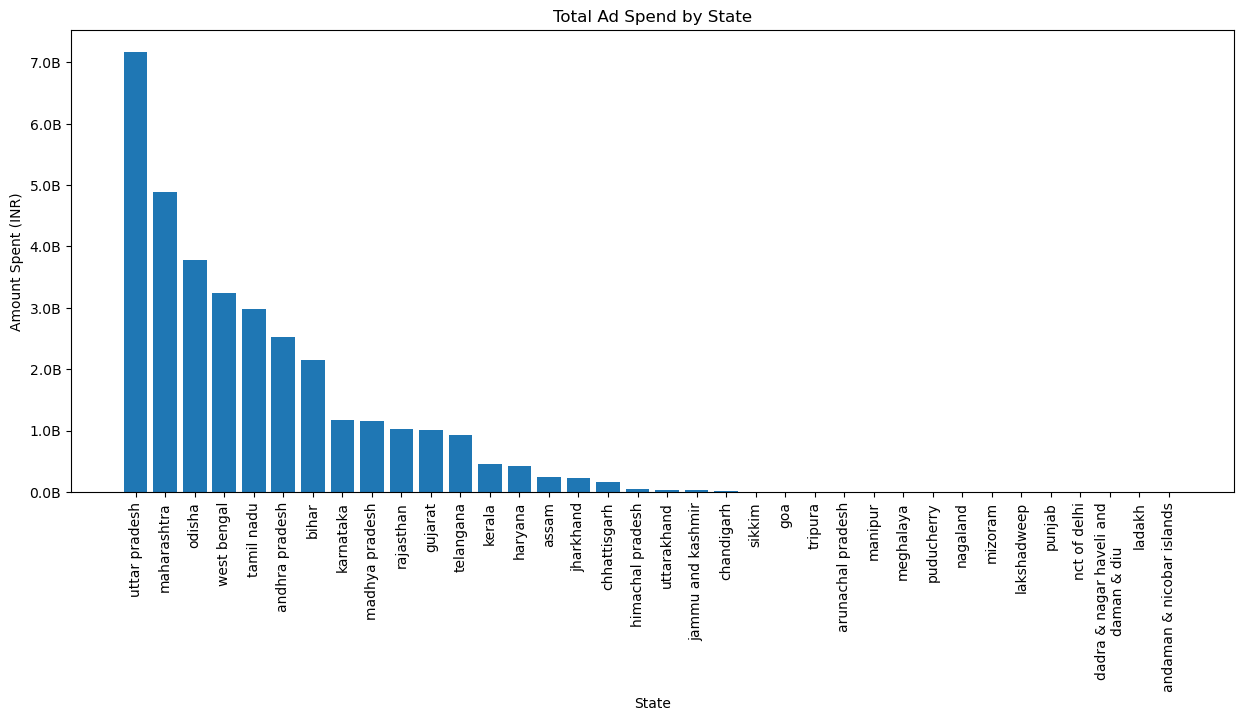

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'

# Create the plot
plt.figure(figsize=(15, 6))
plt.bar(x=SpendByState['State'], height=SpendByState['Amount spent (INR)'])

# Add labels and title
plt.title("Total Ad Spend by State")
plt.xlabel('State')
plt.ylabel('Amount Spent (INR)')
plt.xticks(rotation=90)

# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))

# Show the plot
plt.show()


observation shows that utter pradesh spent more on ads then followed by maharashtra, odisha, west bengal and tamilnadu

In [39]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().sort_values(ascending=False).reset_index()
state_voter_turnout         

# Voter turnout by state refers to the percentage of eligible voters who actually cast their votes in an election, broken down by individual states. 

,State,Polled (%)
0,lakshadweep,84.160000
1,tripura,80.920000
2,assam,80.882857
3,andhra pradesh,80.770800
4,sikkim,79.880000
5,west bengal,79.188095
6,puducherry,78.900000
7,arunachal pradesh,78.455000
8,manipur,78.030000
9,meghalaya,77.575000


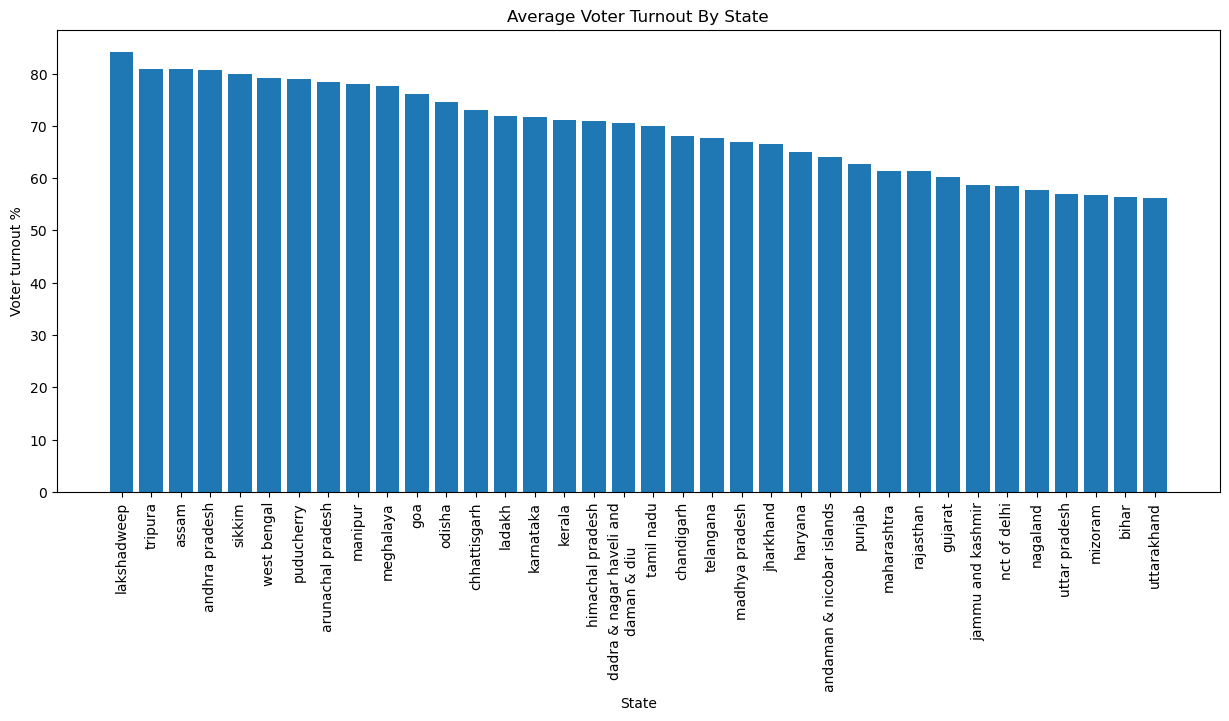

In [41]:
plt.figure(figsize=(15,6))
plt.bar(x = state_voter_turnout['State'], height = state_voter_turnout['Polled (%)'])
plt.xlabel('State')
plt.ylabel('Voter turnout %')
plt.title('Average Voter Turnout By State')
plt.xticks(rotation=90)
plt.show()

Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%. It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.

In [44]:
advertisers.head(2)

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846


In [46]:
# pd.to_numeric: Converts values in the column to numeric data types.
# errors='coerce': If any value in the column cannot be converted to a number (e.g., text or special characters), it is replaced with NaN (a placeholder for missing values).

advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors = 'coerce')

advertisers.dropna(subset = ['Amount spent (INR)'], inplace=True)

# dropna: Removes rows with missing values.
# subset=['Amount spent (INR)']: Specifies that only rows where the Amount spent (INR) column has NaN will be removed.

In [48]:
advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False).reset_index()

,Page name,Amount spent (INR)
0,Bharatiya Janata Party (BJP),193854342.0
1,Ama Chinha Sankha Chinha,112412941.0
2,Indian National Congress,108787100.0
3,Ellorum Nammudan,23806041.0
4,BJP Odisha,19573782.0
...,...,...
11585,Ranjit Nath,101.0
11586,Old coin selling company in Mumbai India,101.0
11587,chilliestirupati,101.0
11588,nihitsirpolity,101.0


In [84]:
top_5_parties = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False).reset_index().head()

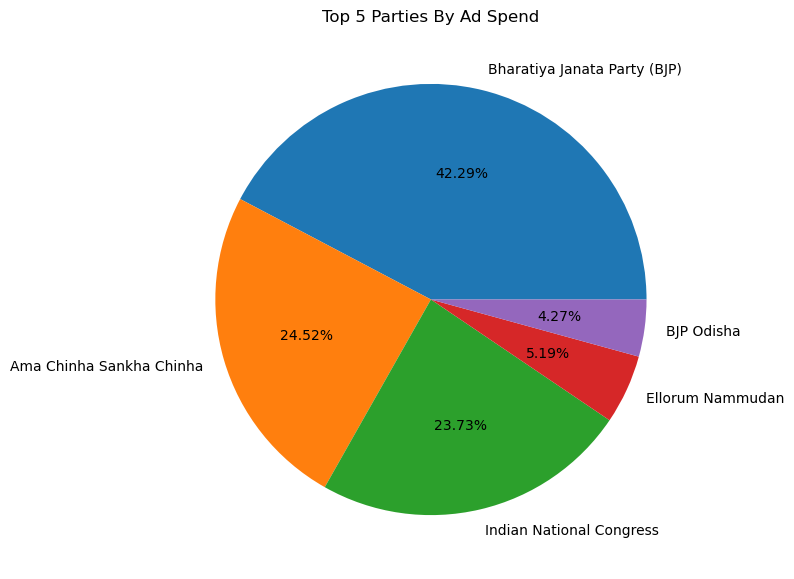

In [99]:
plt.figure(figsize=(9,7))
plt.pie(top_5_parties['Amount spent (INR)'],labels = top_5_parties['Page name'], autopct = '%1.2f%%')
plt.title("Top 5 Parties By Ad Spend")
plt.show()

The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.

In [101]:
# calculate the correlation between amount spent on ad and voter turnout

correlation = merged_data[['Amount spent (INR)','Polled (%)']].corr()
correlation

,Amount spent (INR),Polled (%)
Amount spent (INR),1.000000,-0.010688
Polled (%),-0.010688,1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

In [54]:
merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [104]:
phase_analysis = merged_data.groupby('Phase')[['Amount spent (INR)','Total Votes']].sum().reset_index()

In [106]:
phase_analysis

,Phase,Amount spent (INR),Total Votes
0,1.0,5.556265e+09,220104206
1,2.0,3.986936e+09,211661144
2,3.0,4.726512e+09,226469352
3,4.0,7.732806e+09,244938638
4,5.0,4.346064e+09,111421236
5,6.0,3.872711e+09,141089866


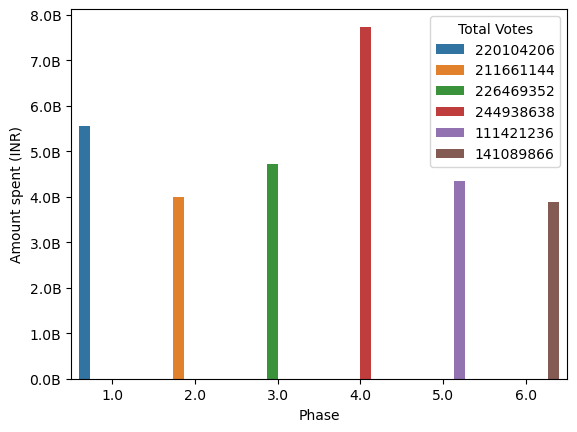

In [108]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter for billions
def format_amount(x, pos):
    return f'{x / 1e9:.1f}B'  # Divide by 1e9 and append 'B'
# Apply the custom formatter for billions
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_amount))



phase_analysis['Total Votes'] = phase_analysis['Total Votes'].astype(str)
sns.barplot(x = 'Phase', y = 'Amount spent (INR)', hue = 'Total Votes', data = phase_analysis)

plt.show()

here is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout . However, phase 1, despite high ad spend, has a lower voter turnout. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.


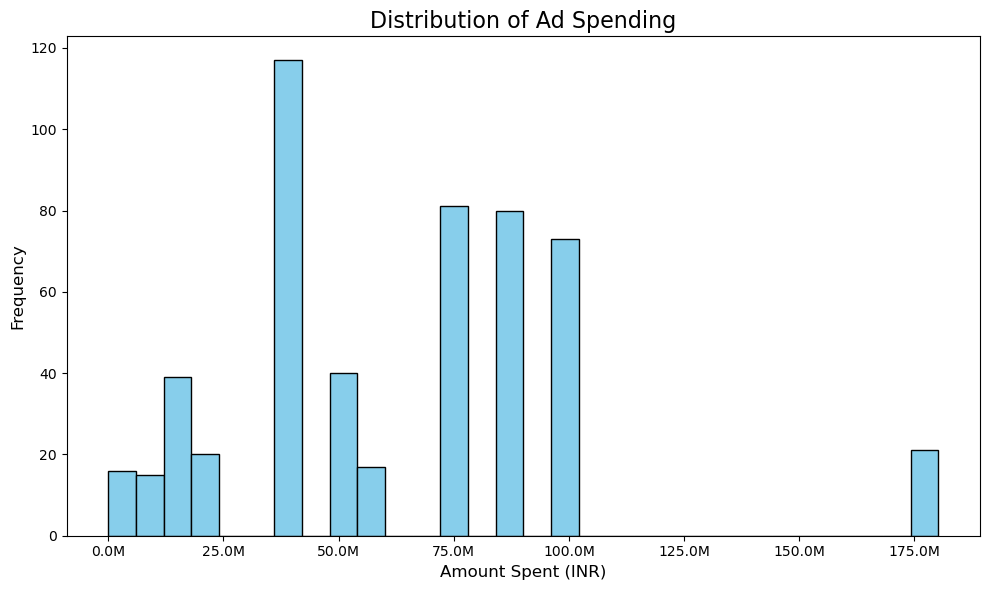

In [122]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter for millions
def format_amount_millions(x, pos):
    """Format the x-axis values to show millions with 'M'."""
    return f'{x / 1e6:.1f}M'  # Divide by 1e6 and append 'M'

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(x=merged_data['Amount spent (INR)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ad Spending', fontsize=16)
plt.xlabel('Amount Spent (INR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Apply the custom formatter for millions
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_amount_millions))

# Show the plot
plt.tight_layout()
plt.show()



In [128]:

merged_data['Amount spent (INR)'].describe()

count    5.190000e+02
mean     6.492553e+07
std      3.813202e+07
min      1.984700e+04
25%      4.042540e+07
50%      5.449617e+07
75%      8.966813e+07
max      1.802523e+08
Name: Amount spent (INR), dtype: float64

In [130]:
# Format the output for better readability
desc = merged_data['Amount spent (INR)'].describe()
formatted_desc = desc.apply(lambda x: f"{x:,.2f}")
print(formatted_desc)

count            519.00
mean      64,925,526.21
std       38,132,024.50
min           19,847.00
25%       40,425,399.00
50%       54,496,166.00
75%       89,668,131.00
max      180,252,277.00
Name: Amount spent (INR), dtype: object


## Conclusion



Overall, the analyses indicate that higher ad spend does not guarantee higher voter turnout and voter engagement is influenced by various other factors. Larger and more significant states tend to spend more on ads, but this does not necessarily translate to higher voter participation. Political parties, particularly the BJP, invest heavily in advertising, yet the effectiveness of this spending in increasing voter turnout is questionable.